In [1]:
# Import statements 
# 
import os
os.chdir("..")

import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

from aztec_gddt.metrics import *
from aztec_gddt.plot_tools import *

In [2]:
# Reading data 
data = pd.read_pickle("data/simulations/sim_df.pkl.zip")


In [3]:
processed_data = process_df(data)
processed_data

,time_l1,delta_l1_blocks,advance_l1_blocks,agents,current_process,transactions,gas_fee_l1,gas_fee_blob,finalized_blocks_count,cumm_block_rewards,...,blob_gas_threshold_for_tx,proving_marketplace_usage_probability,rewards_to_provers,rewards_to_relay,gwei_to_tokens,slash_params,commit_bond_amount,op_costs,process_id,process_phase
1,1.0,0.0,0.0,"{'relay': Agent(uuid='relay', balance=0.0, is_...",Process(uuid=UUID('a8eba58f-1edc-4b0f-87c1-023...,{},1.0,1.0,0.0,200.0,...,50.0,0.0,0.5,0.0,1.000000e-09,"SlashParameters(failure_to_commit_bond=2.0, fa...",10.0,0.0,a8eba58f-1edc-4b0f-87c1-023ee5f0f6fe,1
2,2.0,0.0,0.0,"{'relay': Agent(uuid='relay', balance=0.0, is_...",Process(uuid=UUID('a8eba58f-1edc-4b0f-87c1-023...,{},3.0,1.0,0.0,200.0,...,50.0,0.0,0.5,0.0,1.000000e-09,"SlashParameters(failure_to_commit_bond=2.0, fa...",10.0,0.0,a8eba58f-1edc-4b0f-87c1-023ee5f0f6fe,1
3,3.0,0.0,0.0,"{'relay': Agent(uuid='relay', balance=0.0, is_...",Process(uuid=UUID('a8eba58f-1edc-4b0f-87c1-023...,{29f2aac9-71a9-4e4c-80b9-9edd54cb7991: Proposa...,1.0,25.0,0.0,200.0,...,50.0,0.0,0.5,0.0,1.000000e-09,"SlashParameters(failure_to_commit_bond=2.0, fa...",10.0,0.0,a8eba58f-1edc-4b0f-87c1-023ee5f0f6fe,1
4,4.0,0.0,0.0,"{'relay': Agent(uuid='relay', balance=0.0, is_...",Process(uuid=UUID('a8eba58f-1edc-4b0f-87c1-023...,{29f2aac9-71a9-4e4c-80b9-9edd54cb7991: Proposa...,1.0,30.0,0.0,200.0,...,50.0,0.0,0.5,0.0,1.000000e-09,"SlashParameters(failure_to_commit_bond=2.0, fa...",10.0,0.0,a8eba58f-1edc-4b0f-87c1-023ee5f0f6fe,1
5,5.0,0.0,0.0,"{'relay': Agent(uuid='relay', balance=0.0, is_...",Process(uuid=UUID('a8eba58f-1edc-4b0f-87c1-023...,{29f2aac9-71a9-4e4c-80b9-9edd54cb7991: Proposa...,1.0,1.0,0.0,200.0,...,50.0,0.0,0.5,0.0,1.000000e-09,"SlashParameters(failure_to_commit_bond=2.0, fa...",10.0,0.0,a8eba58f-1edc-4b0f-87c1-023ee5f0f6fe,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031988,246.0,0.0,0.0,"{'relay': Agent(uuid='relay', balance=0.0, is_...",Process(uuid=UUID('4d154126-a754-4199-a0e7-632...,{},1.0,1.0,0.0,200.0,...,50.0,0.0,0.5,0.0,1.000000e-09,"SlashParameters(failure_to_commit_bond=2.0, fa...",10.0,0.0,4d154126-a754-4199-a0e7-6329dd548d9f,1
1031989,247.0,0.0,0.0,"{'relay': Agent(uuid='relay', balance=0.0, is_...",Process(uuid=UUID('4d154126-a754-4199-a0e7-632...,{},1.0,1.0,0.0,200.0,...,50.0,0.0,0.5,0.0,1.000000e-09,"SlashParameters(failure_to_commit_bond=2.0, fa...",10.0,0.0,4d154126-a754-4199-a0e7-6329dd548d9f,1
1031990,248.0,0.0,0.0,"{'relay': Agent(uuid='relay', balance=0.0, is_...",Process(uuid=UUID('4d154126-a754-4199-a0e7-632...,{},31.0,18.0,0.0,200.0,...,50.0,0.0,0.5,0.0,1.000000e-09,"SlashParameters(failure_to_commit_bond=2.0, fa...",10.0,0.0,4d154126-a754-4199-a0e7-6329dd548d9f,1
1031991,249.0,0.0,0.0,"{'relay': Agent(uuid='relay', balance=0.0, is_...",Process(uuid=UUID('4d154126-a754-4199-a0e7-632...,{},1.0,1.0,0.0,200.0,...,50.0,0.0,0.5,0.0,1.000000e-09,"SlashParameters(failure_to_commit_bond=2.0, fa...",10.0,0.0,4d154126-a754-4199-a0e7-6329dd548d9f,1


In [4]:
# Postprocessing data into a form for plotting

 #   g1_trajectory_kpis = {"proportion_race_mode" : find_proportion_race_mode,
 #                     "proportion_slashed_sequencer" : find_proportion_slashed_due_to_sequencer,
 #                     "proportion_slashed_prover" : find_proportion_slashed_due_to_prover,
 #                     "proportion_skipped" : find_proportion_skipped
 #                     }

# NOTE: Mock version for now. 
g1_trajectory_kpis = {"proportion_race_mode": mock_proportion_race_mode,
                      "proportion_slashed_sequencer": mock_proportion_slashed_due_to_sequencer,
                       "proportion_slashed_prover": mock_proportion_slashed_due_to_prover,
                       "proportion_skipped": mock_proportion_skipped}

processed_df = process_df(data)


In [5]:
base_df = extract_df(processed_df,
                         trajectory_kpis = g1_trajectory_kpis,
                         cols_to_drop = ['simulation', 'subset', 'run'])

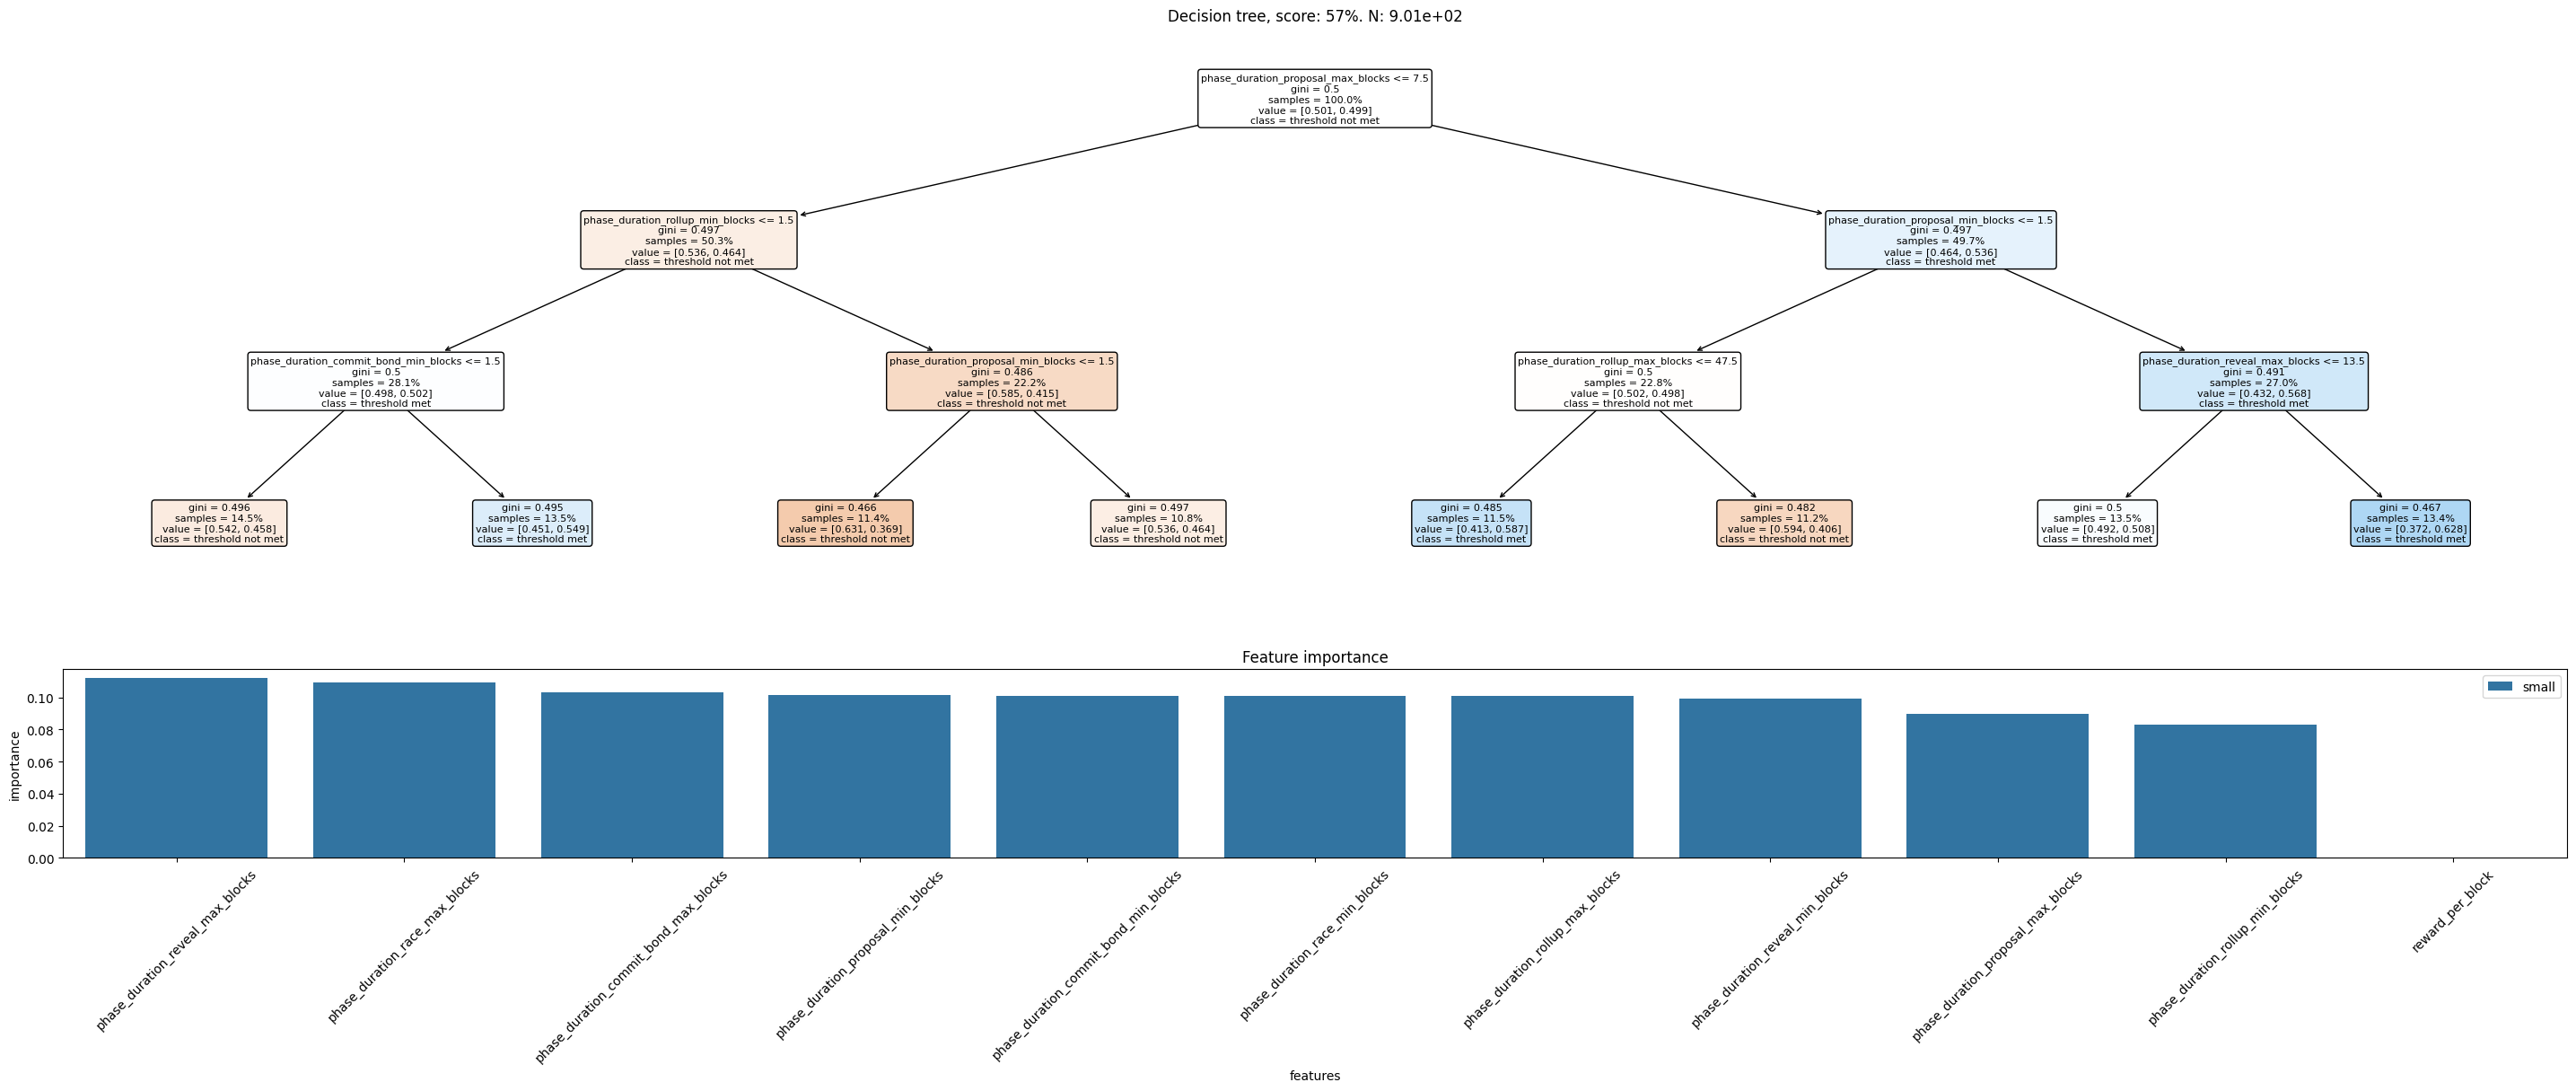

(<Figure size 3600x1200 with 2 Axes>,
 array([<Axes: title={'center': 'Decision tree, score: 57%. N: 9.01e+02'}>,
        <Axes: title={'center': 'Feature importance'}, xlabel='features', ylabel='importance'>],
       dtype=object))

In [6]:
create_decision_tree_importances_plot(base_df,
                                      params_to_use = governance_surface_params,
                                      kpi = "proportion_race_mode")

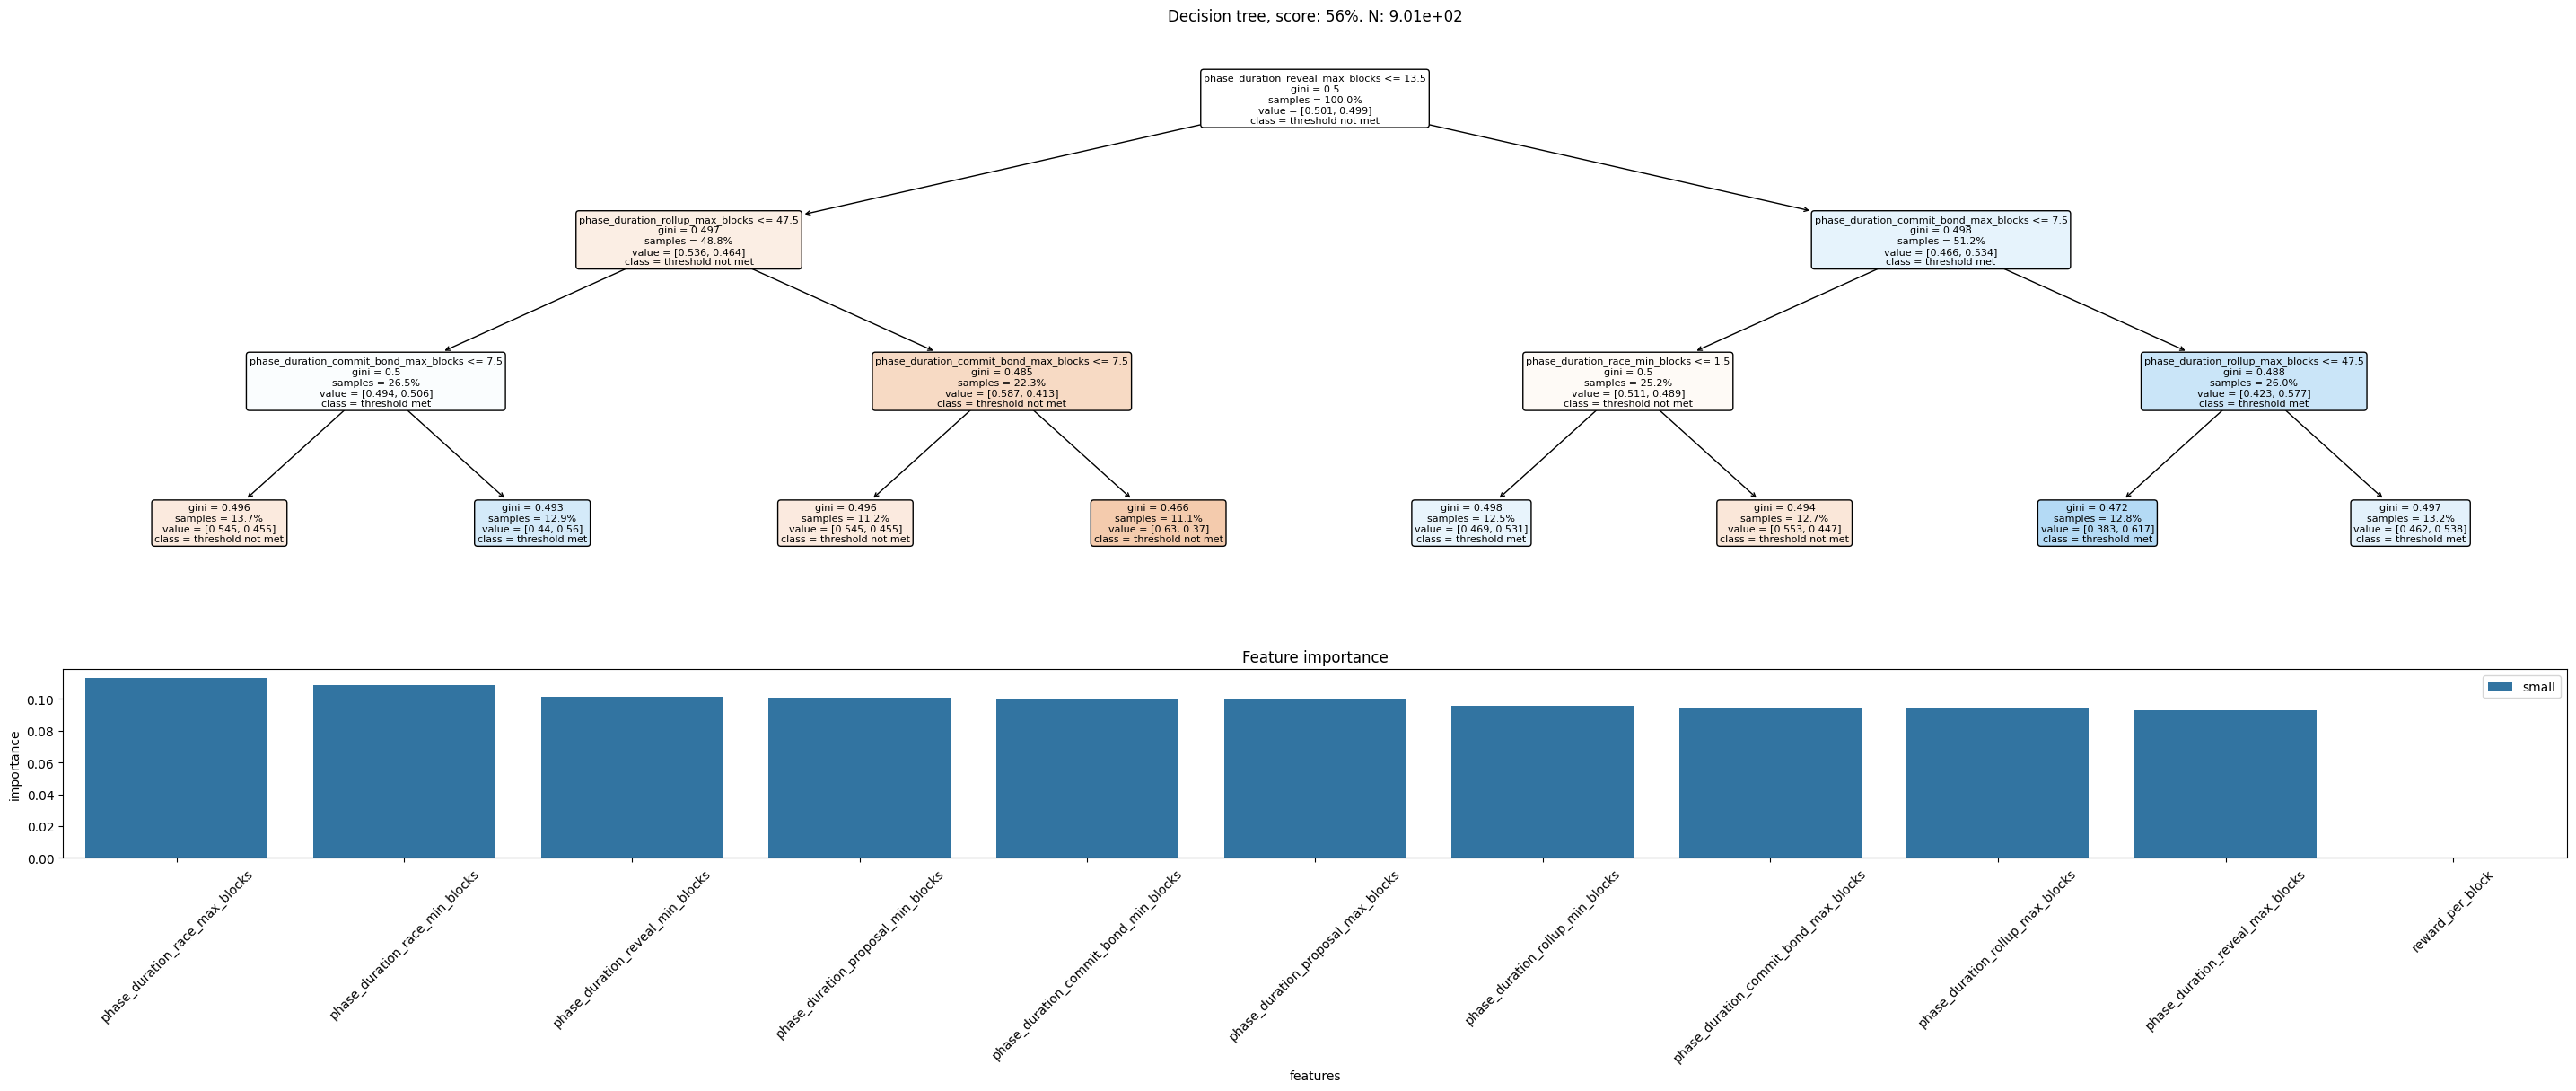

(<Figure size 3600x1200 with 2 Axes>,
 array([<Axes: title={'center': 'Decision tree, score: 56%. N: 9.01e+02'}>,
        <Axes: title={'center': 'Feature importance'}, xlabel='features', ylabel='importance'>],
       dtype=object))

In [7]:
create_decision_tree_importances_plot(base_df,
                                      params_to_use = governance_surface_params,
                                      kpi = "proportion_skipped")

# Parameter Impact on KPIs

c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:78: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.kdeplot(
c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:78: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.kdeplot(


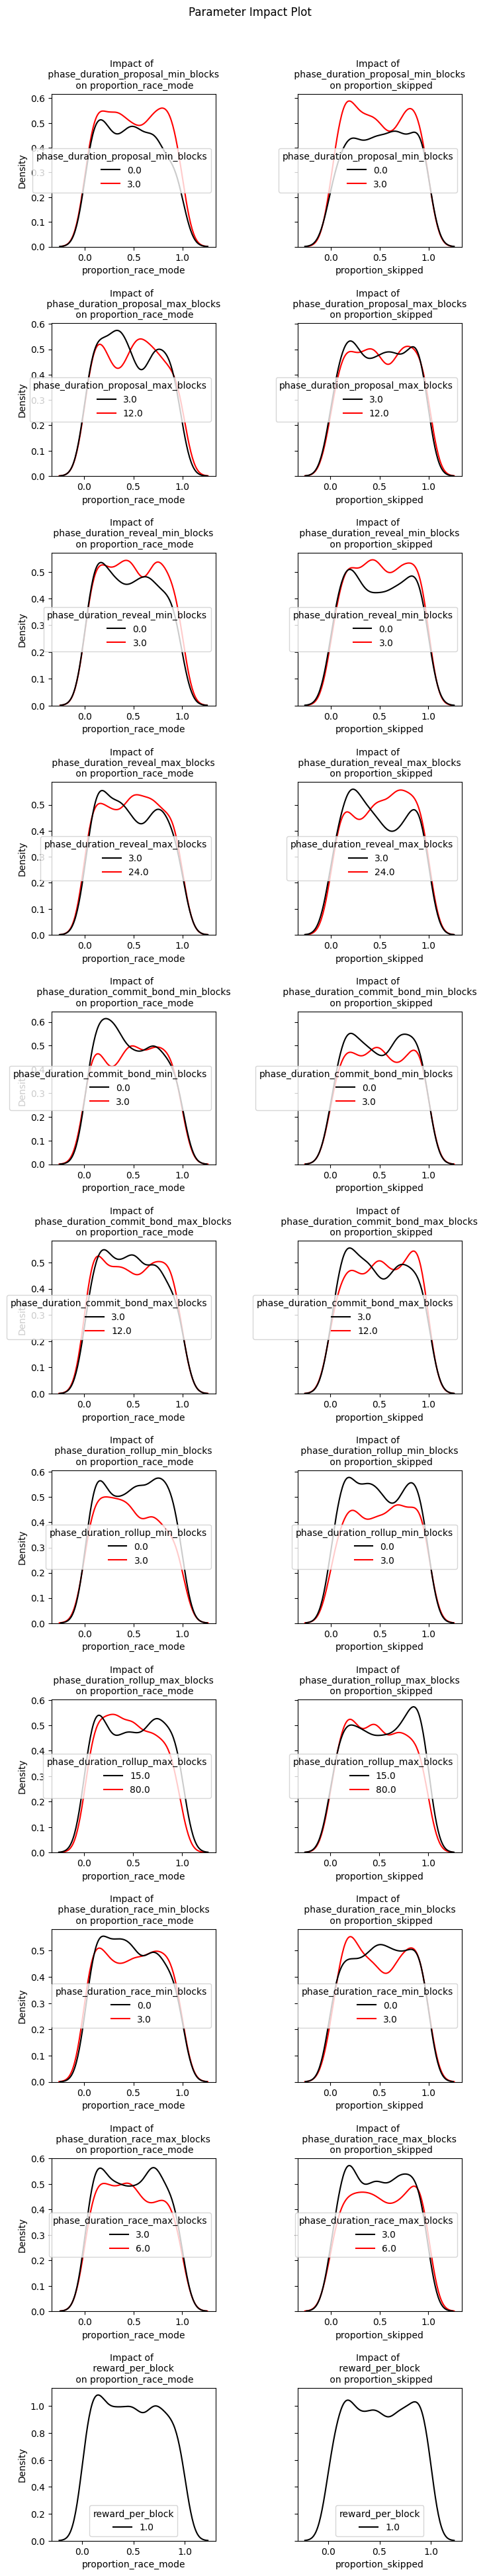

(<Figure size 800x4400 with 22 Axes>,
 array([[<Axes: title={'center': 'Impact of \n phase_duration_proposal_min_blocks \n on proportion_race_mode'}, xlabel='proportion_race_mode', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_proposal_min_blocks \n on proportion_skipped'}, xlabel='proportion_skipped', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n phase_duration_proposal_max_blocks \n on proportion_race_mode'}, xlabel='proportion_race_mode', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_proposal_max_blocks \n on proportion_skipped'}, xlabel='proportion_skipped', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n phase_duration_reveal_min_blocks \n on proportion_race_mode'}, xlabel='proportion_race_mode', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_reveal_min_blocks \n on proportion_skipped'}, xlabel='proportion_skipped', ylabel='Density'>],
   

In [10]:
create_param_impact_dist_plots(df_to_use = base_df,
                               param_cols = governance_surface_params,
                              kpi_cols= ["proportion_race_mode",
                                         "proportion_skipped"],
                              plot_height = 4,
                              plot_width = 4
                               )

c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:78: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.kdeplot(
c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:78: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.kdeplot(


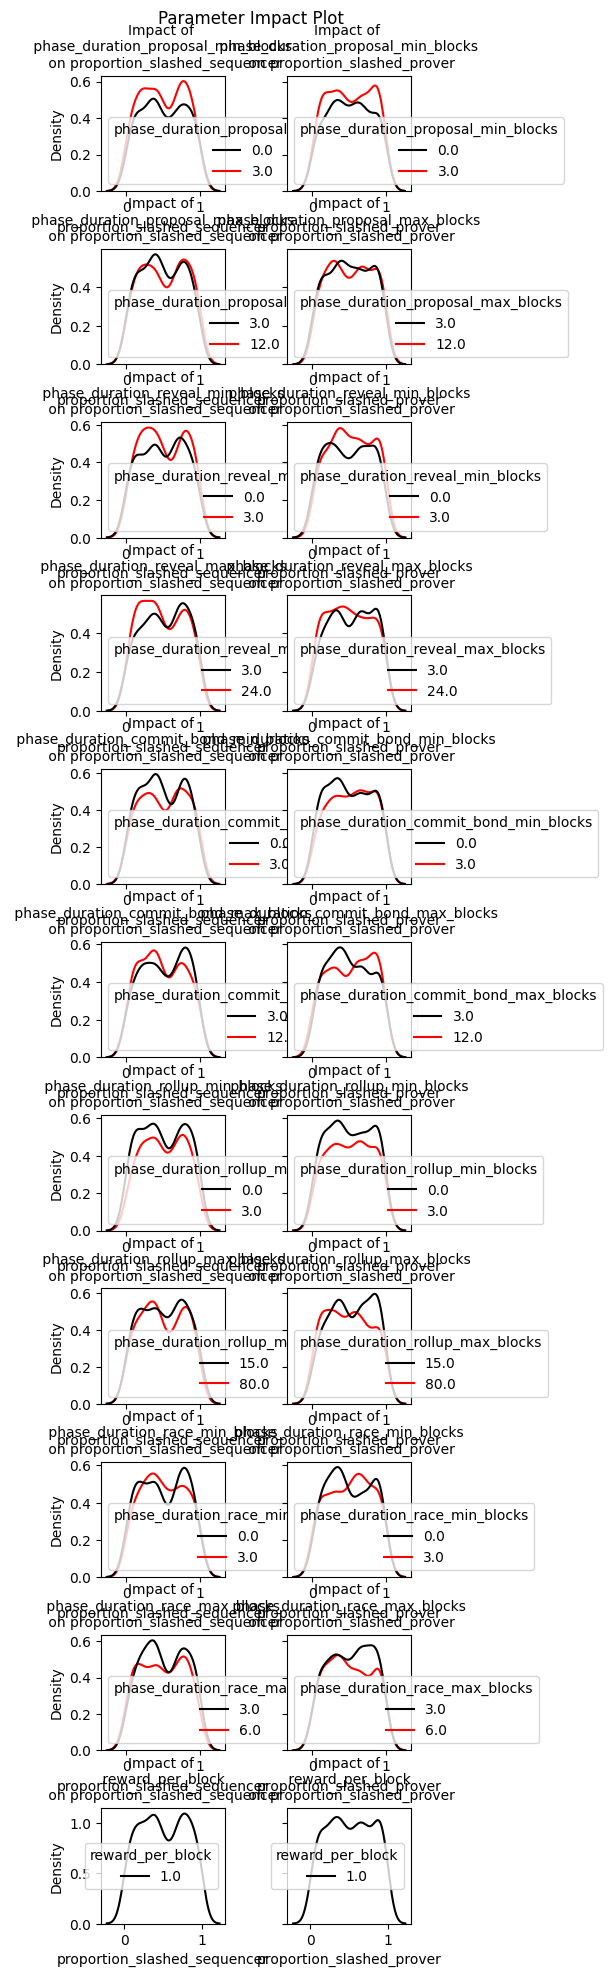

(<Figure size 400x2200 with 22 Axes>,
 array([[<Axes: title={'center': 'Impact of \n phase_duration_proposal_min_blocks \n on proportion_slashed_sequencer'}, xlabel='proportion_slashed_sequencer', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_proposal_min_blocks \n on proportion_slashed_prover'}, xlabel='proportion_slashed_prover', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n phase_duration_proposal_max_blocks \n on proportion_slashed_sequencer'}, xlabel='proportion_slashed_sequencer', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_proposal_max_blocks \n on proportion_slashed_prover'}, xlabel='proportion_slashed_prover', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n phase_duration_reveal_min_blocks \n on proportion_slashed_sequencer'}, xlabel='proportion_slashed_sequencer', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_reveal_min_blocks \n o

In [9]:
create_param_impact_dist_plots(df_to_use = base_df,
                               param_cols = governance_surface_params,
                              kpi_cols= ["proportion_slashed_sequencer", 
                                         "proportion_slashed_prover"]
                               )

# Conclusion
